In [1]:
#import our library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # or DecisionTreeRegressor
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore')
plt.style.use ('seaborn')

In [2]:
data = pd.read_csv ("E:\machine learning/diabetes.csv")
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# checking the number of rows and columns
data.shape

(768, 9)

In [4]:
#getting some information about the datafram
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#number of null values in our dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#To check number of uniqe elements in each columns.
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

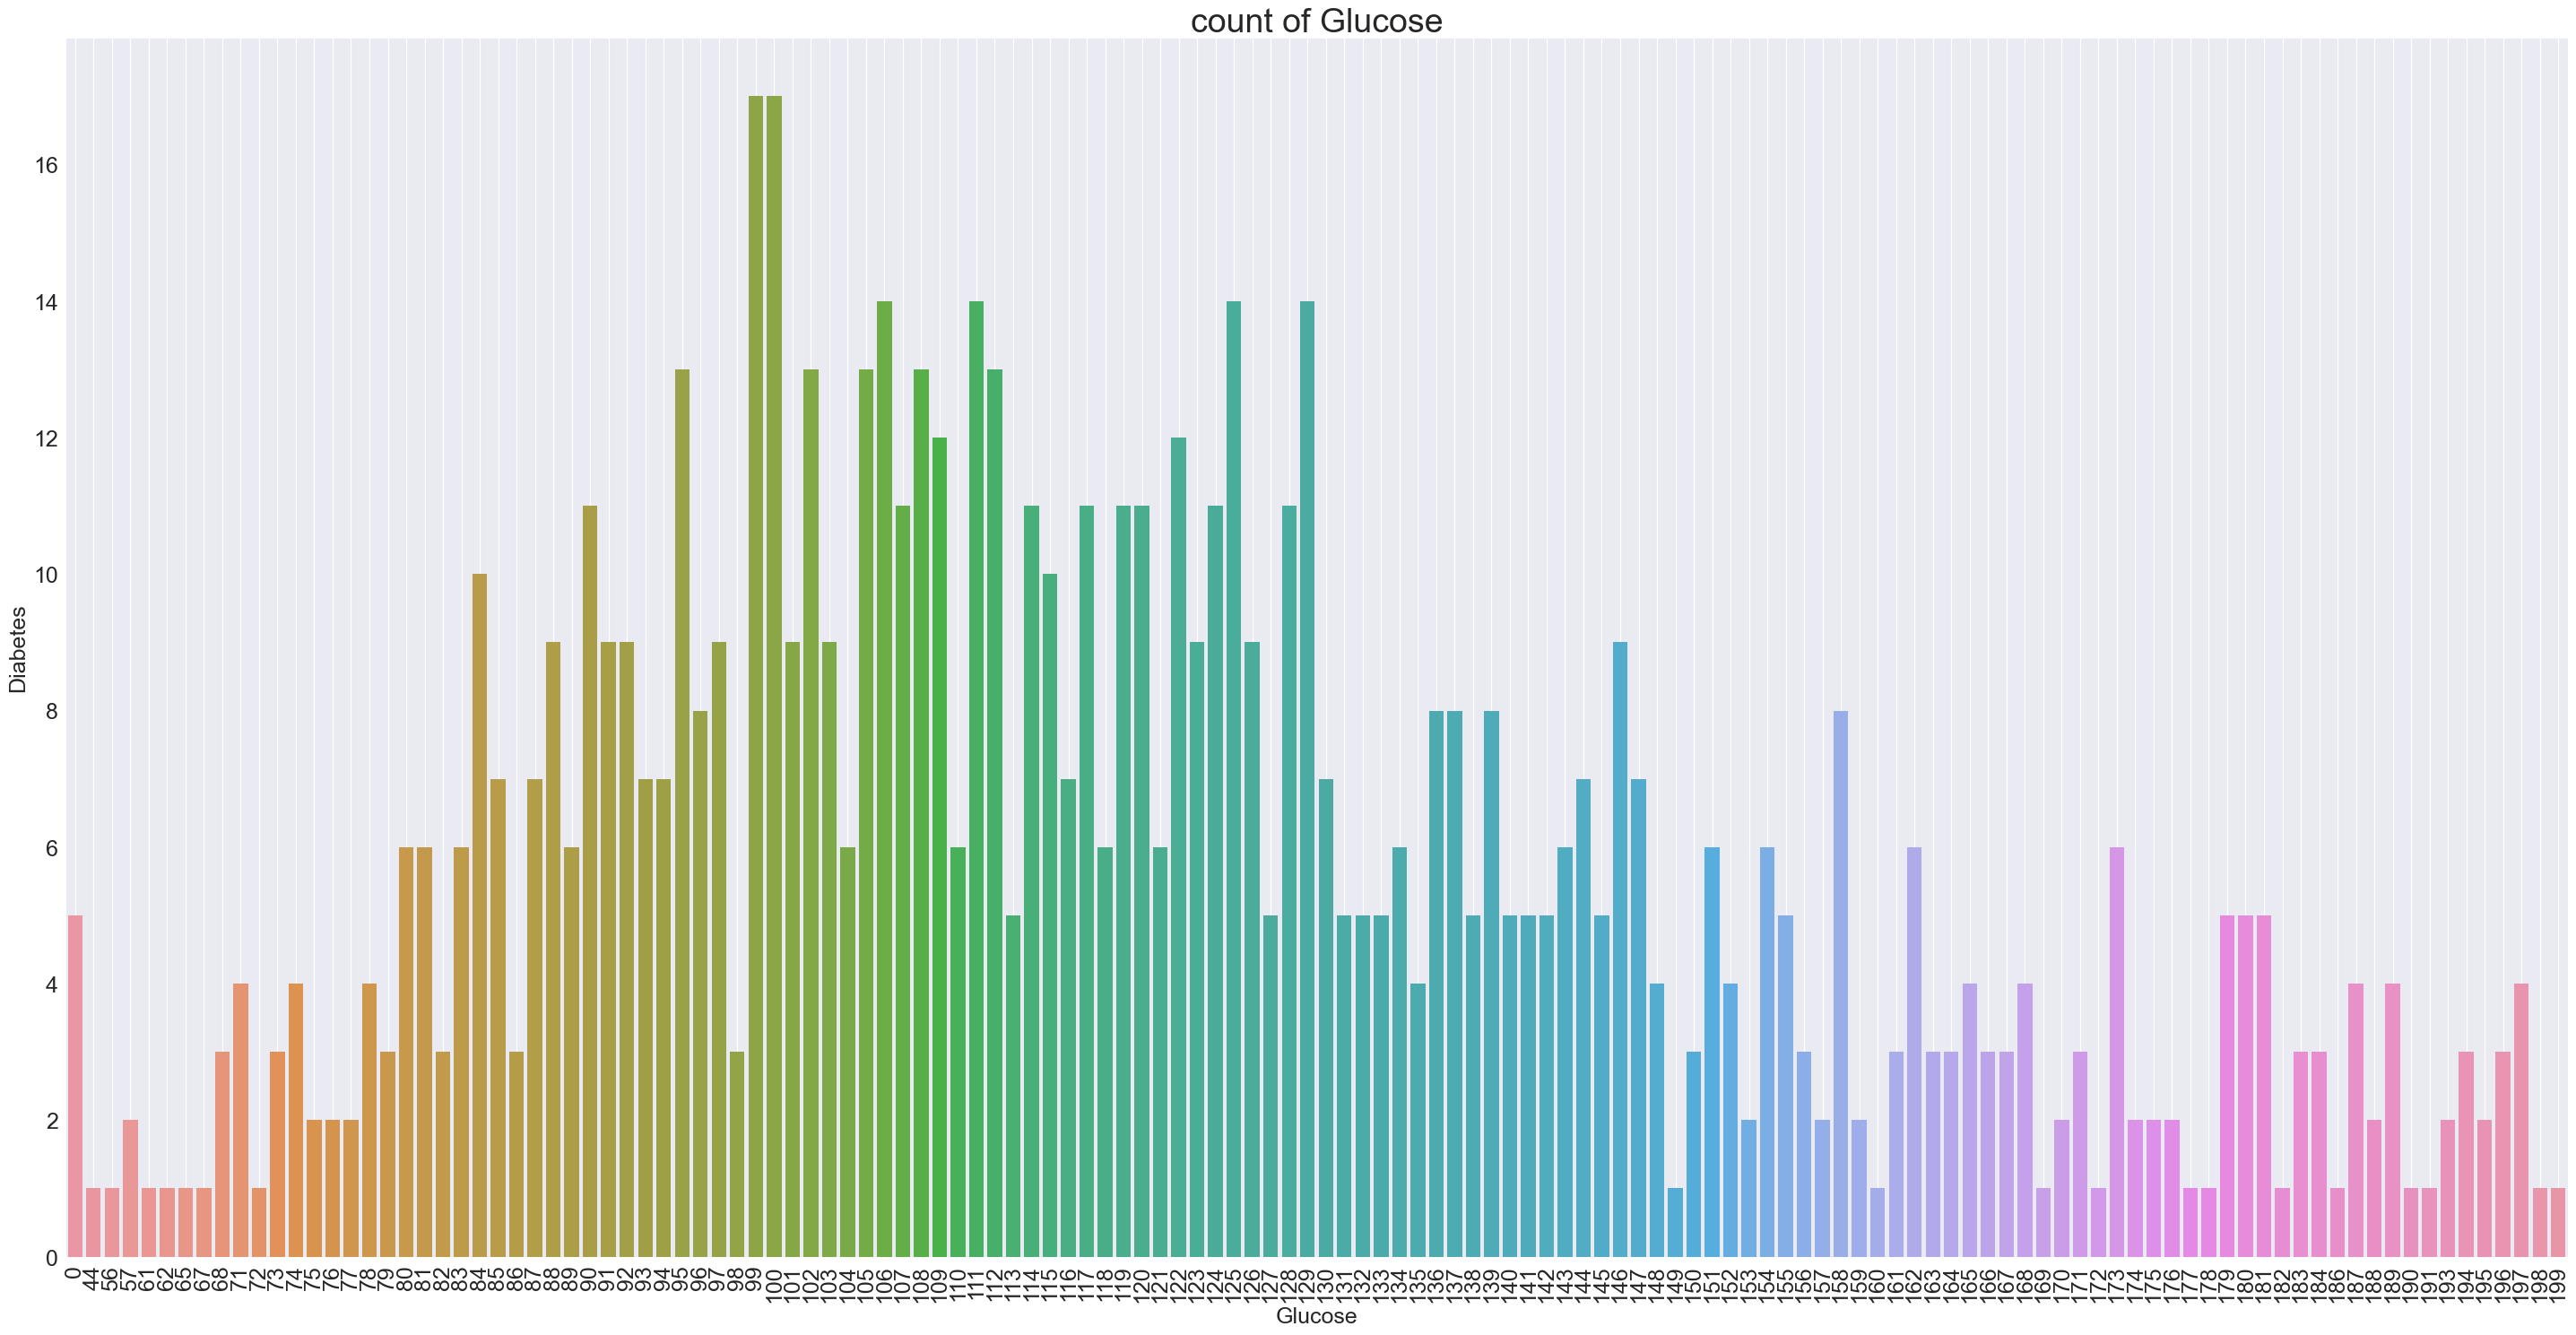

In [7]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='Glucose',data=data)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Glucose',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of Glucose',fontsize=30)
plt.grid()

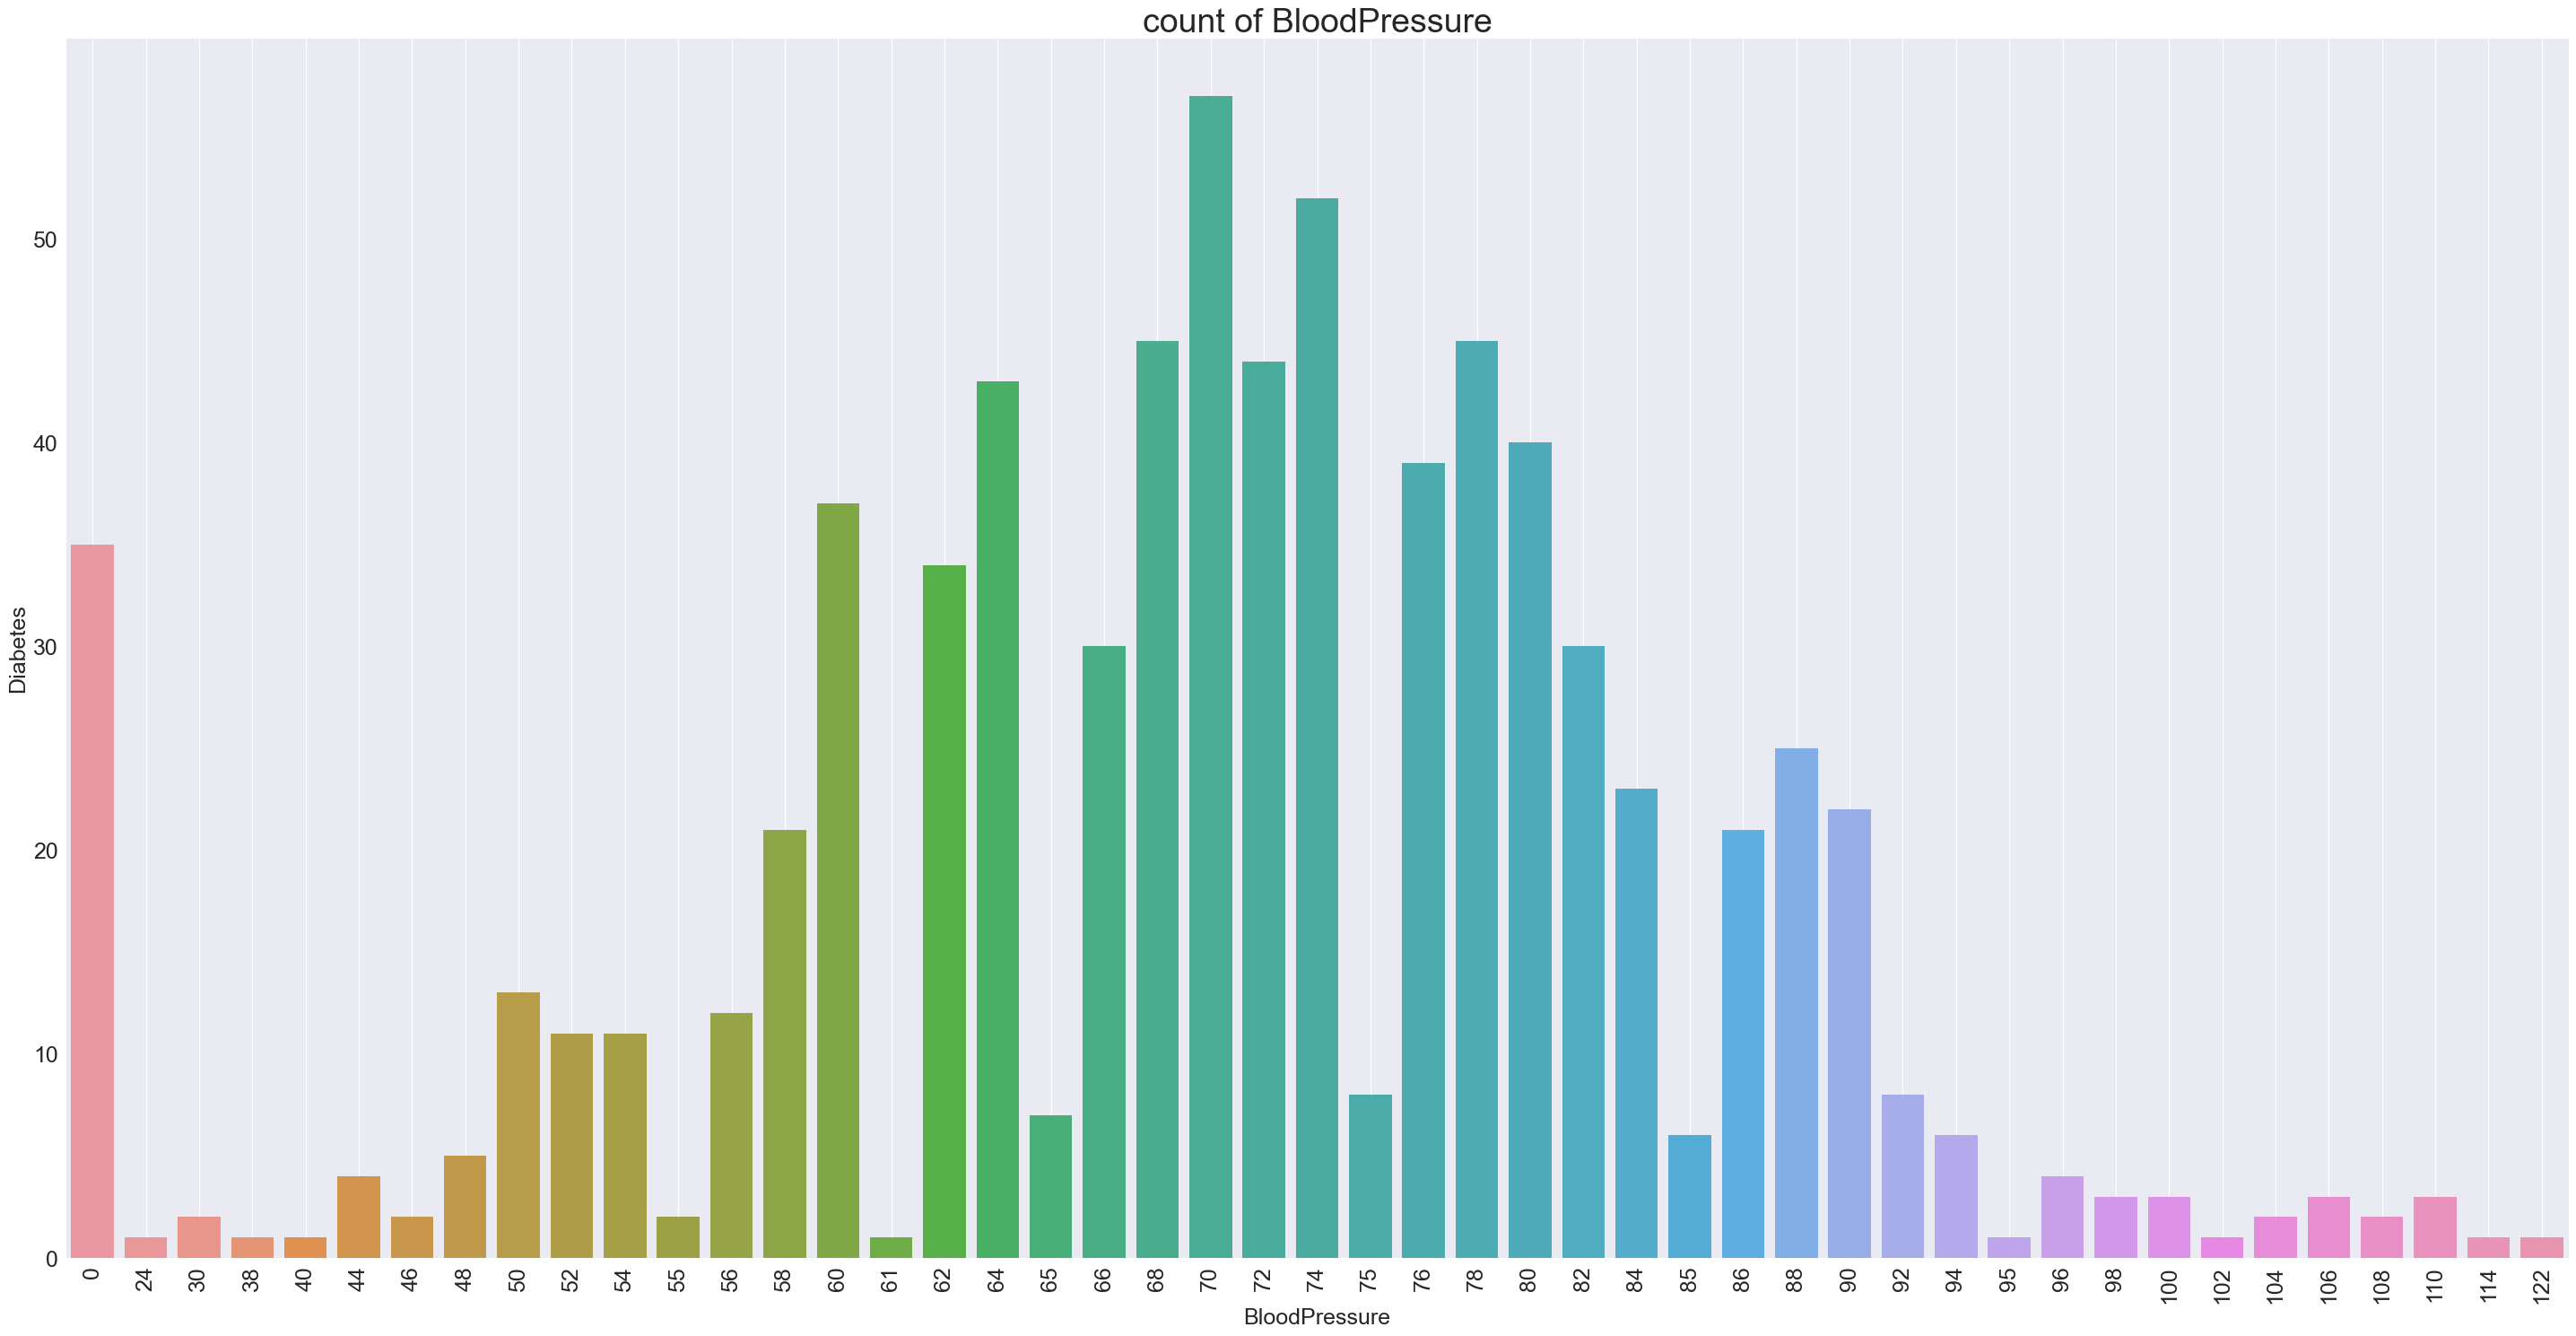

In [8]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='BloodPressure',data=data)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('BloodPressure',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of BloodPressure',fontsize=30)
plt.grid()

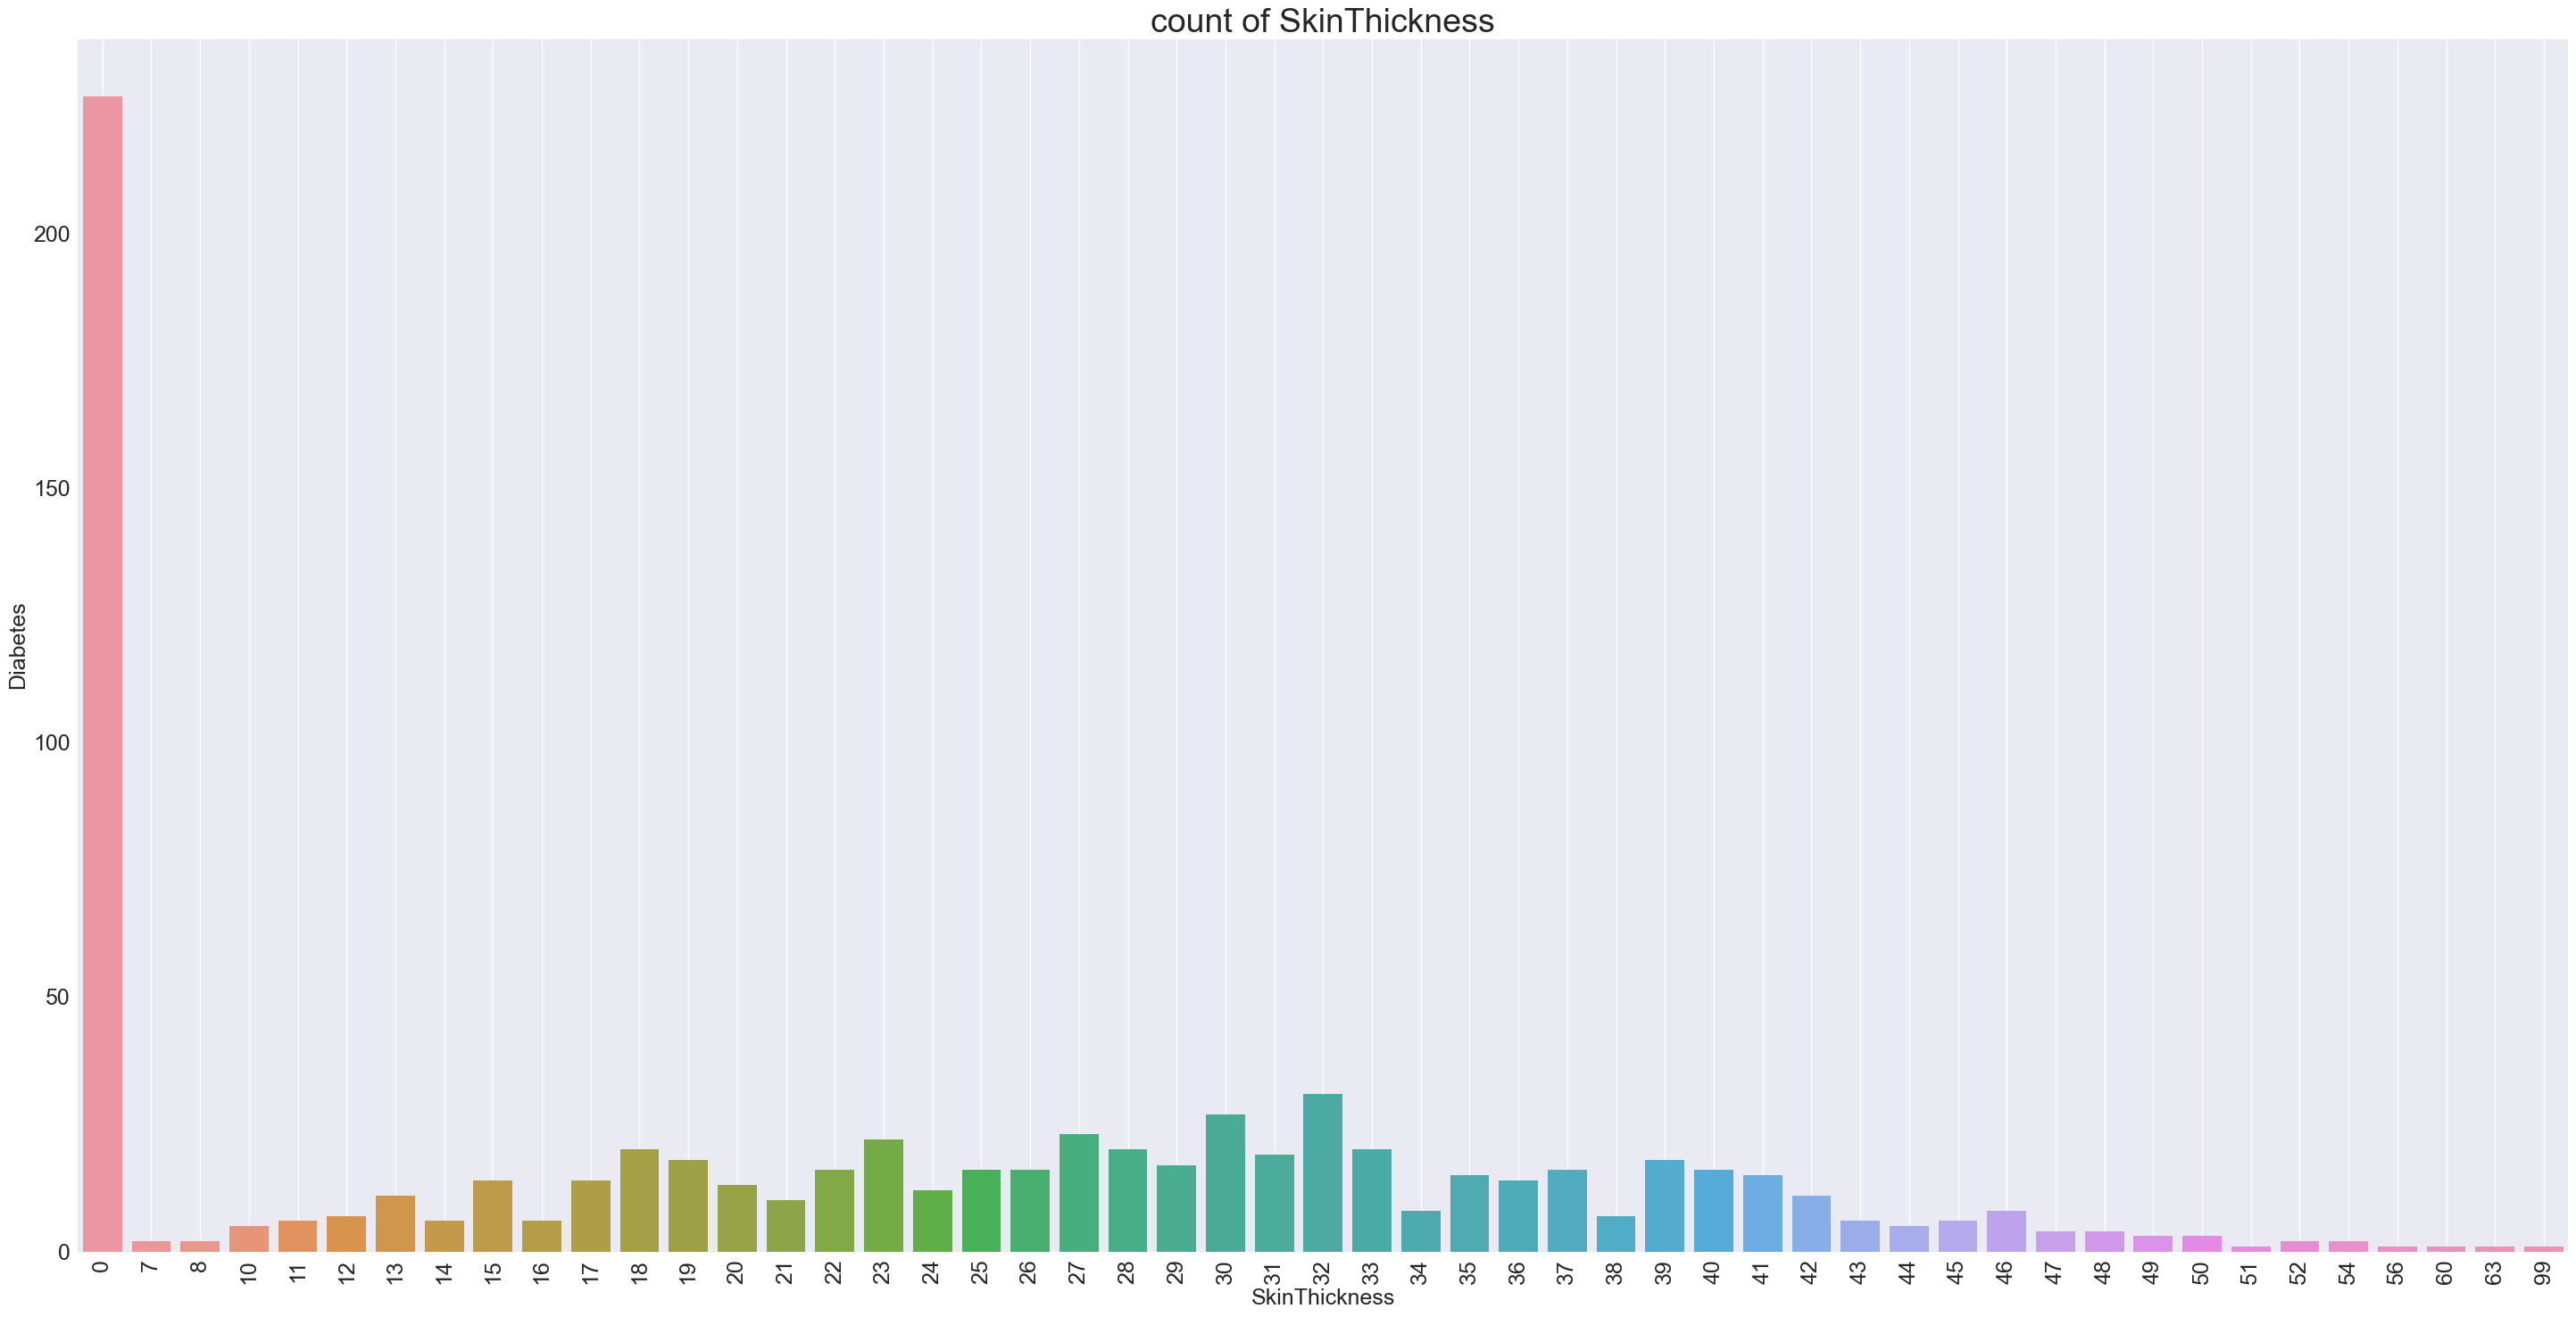

In [9]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='SkinThickness',data=data)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('SkinThickness',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of SkinThickness',fontsize=30)
plt.grid()

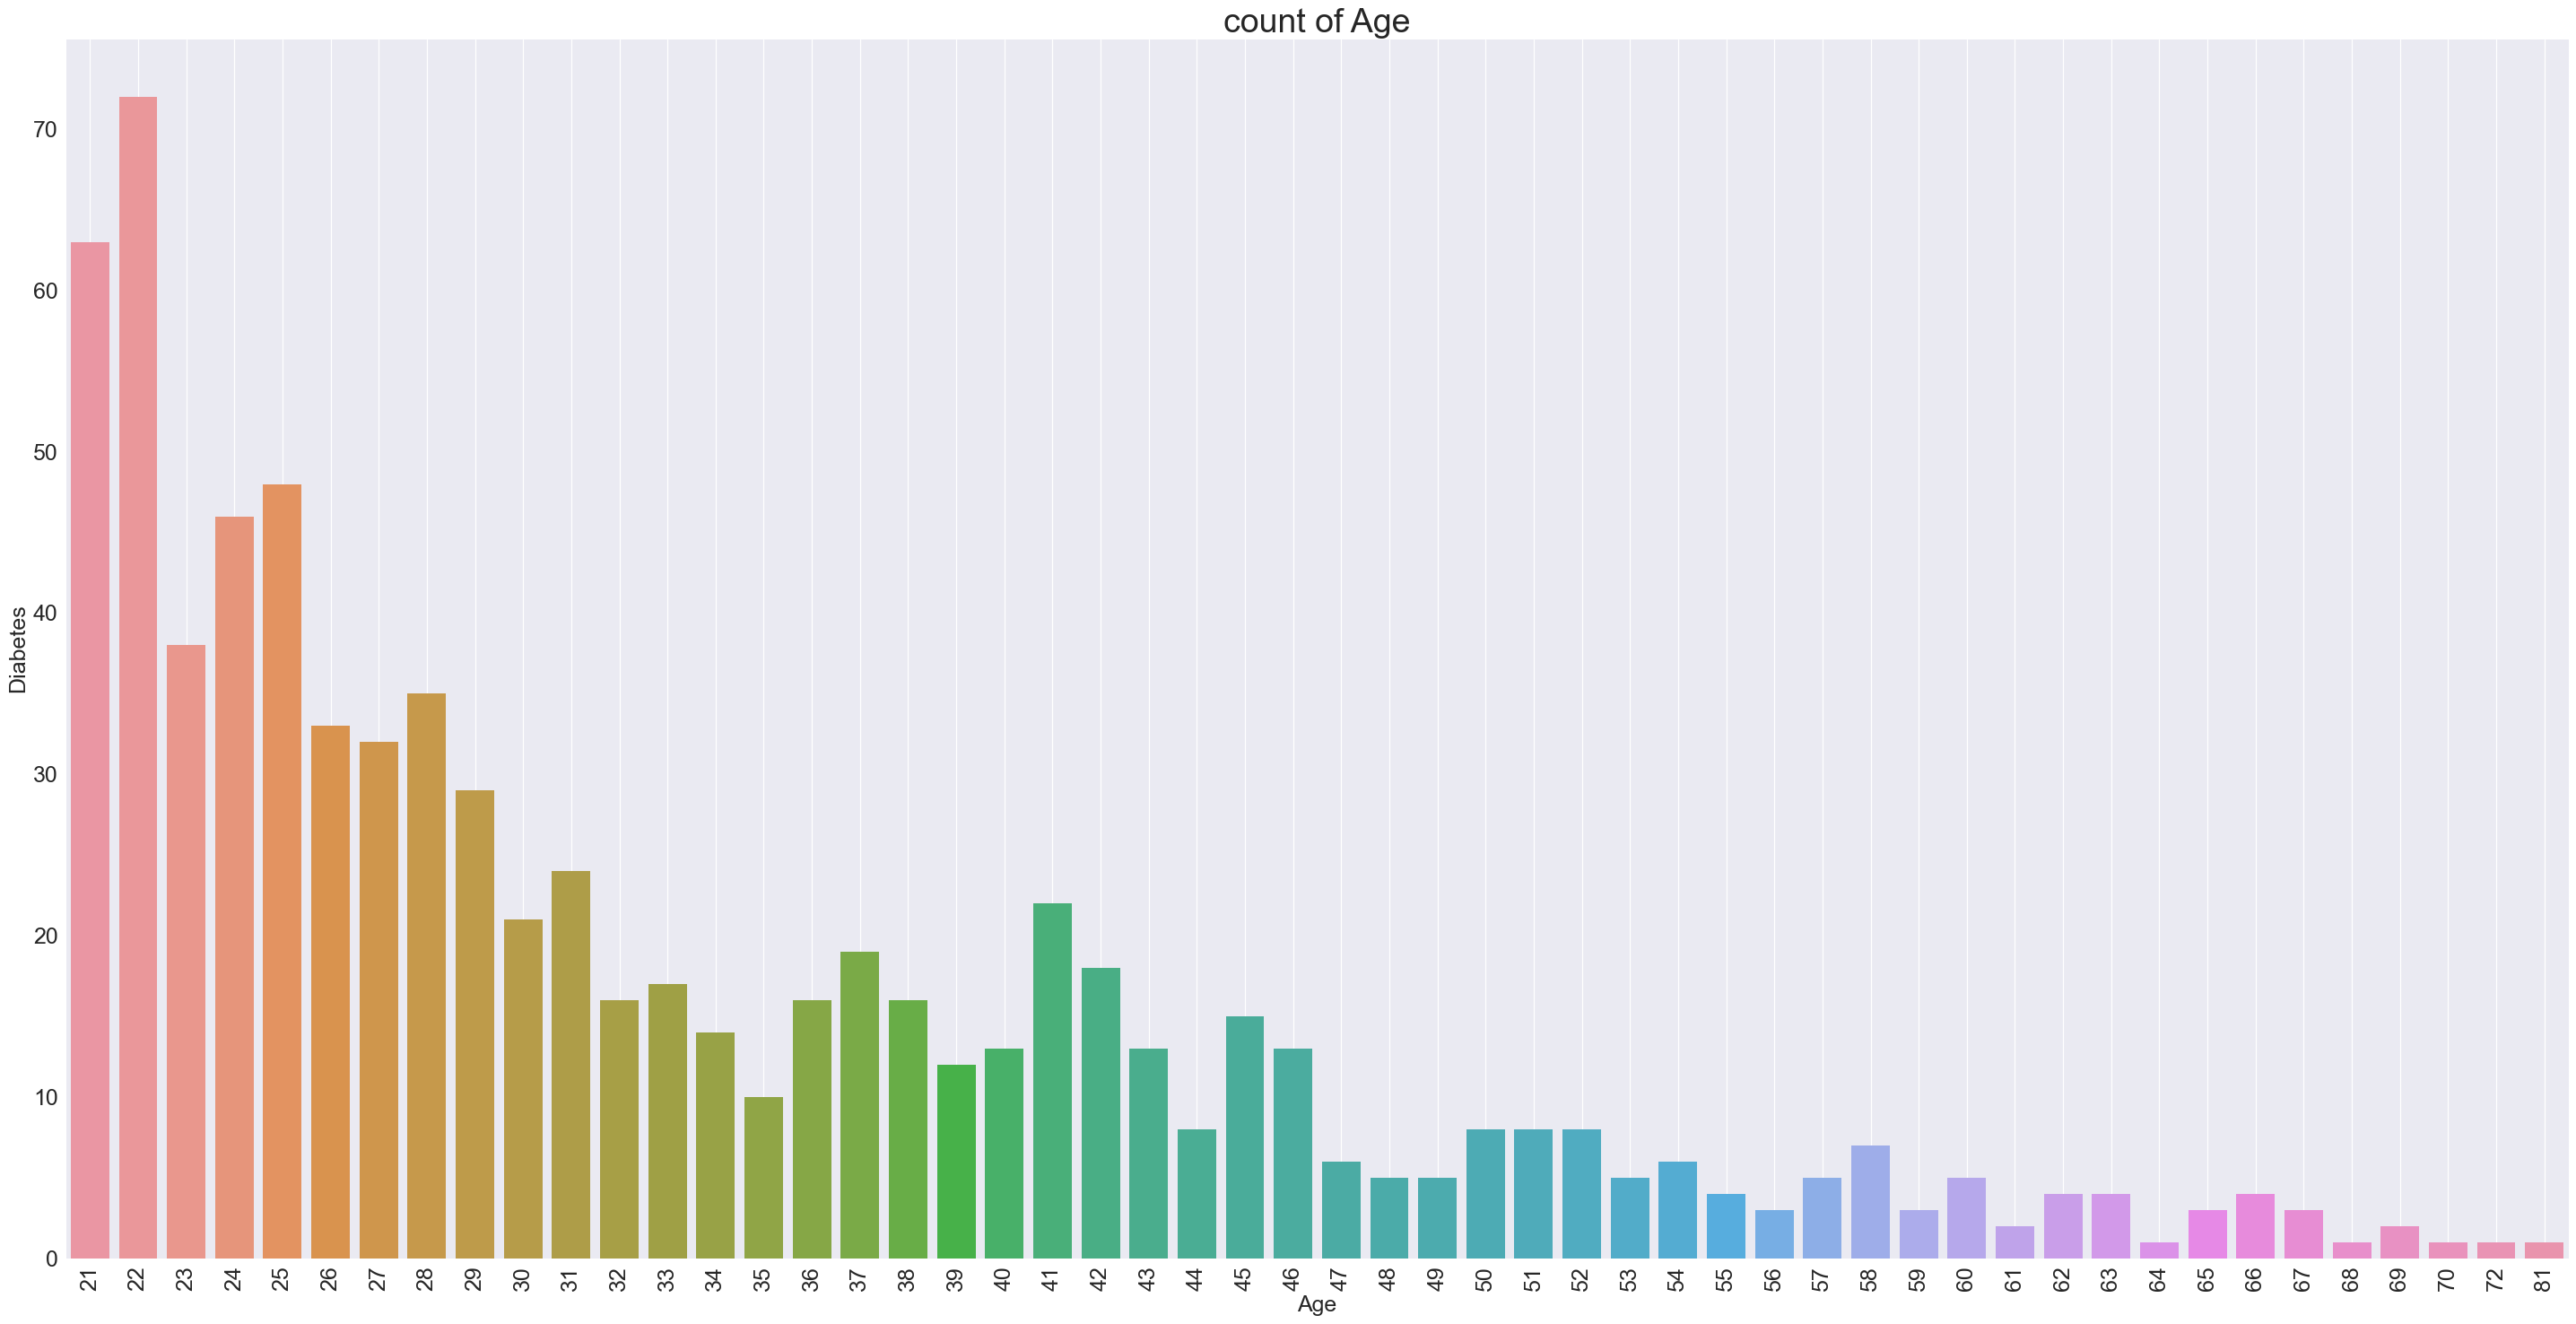

In [10]:
plt.figure(figsize=(40,20),dpi=90)
ax=sns.countplot(x='Age',data=data)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Diabetes',fontsize=20)
plt.title('count of Age',fontsize=30)
plt.grid()

In [11]:
df1=data[data['SkinThickness']>0]
df1=df1[df1['SkinThickness']<90]
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [12]:
df2=df1.dropna(how="any")
df2.reset_index(drop=True, inplace=True)

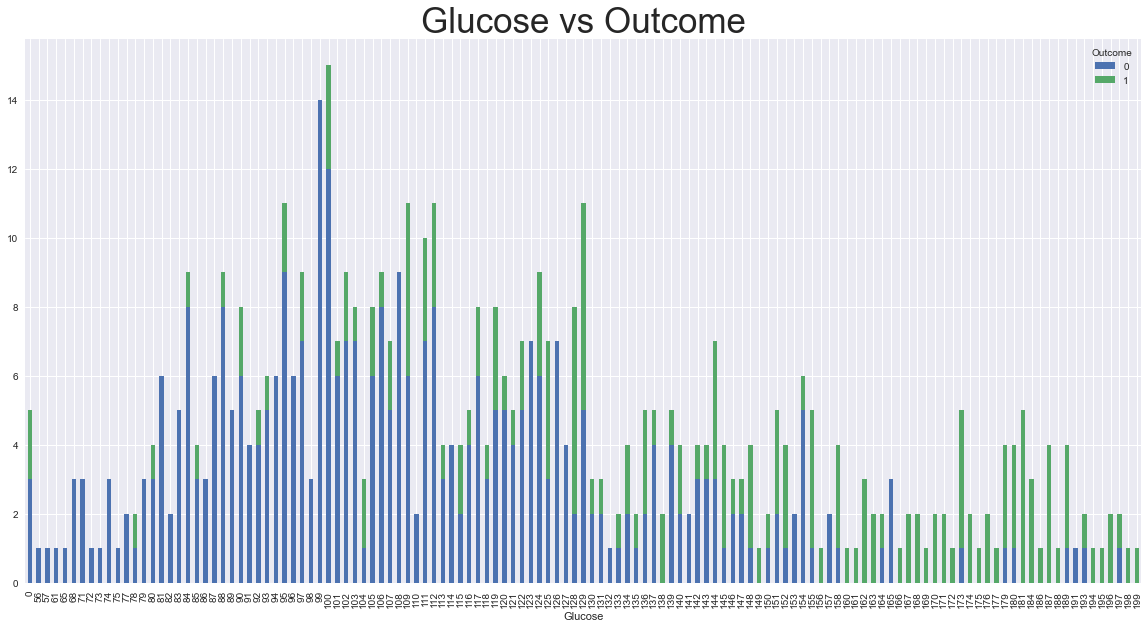

In [13]:
df2.groupby(['Glucose', 'Outcome']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Glucose vs Outcome', fontsize=35)

plt.show()

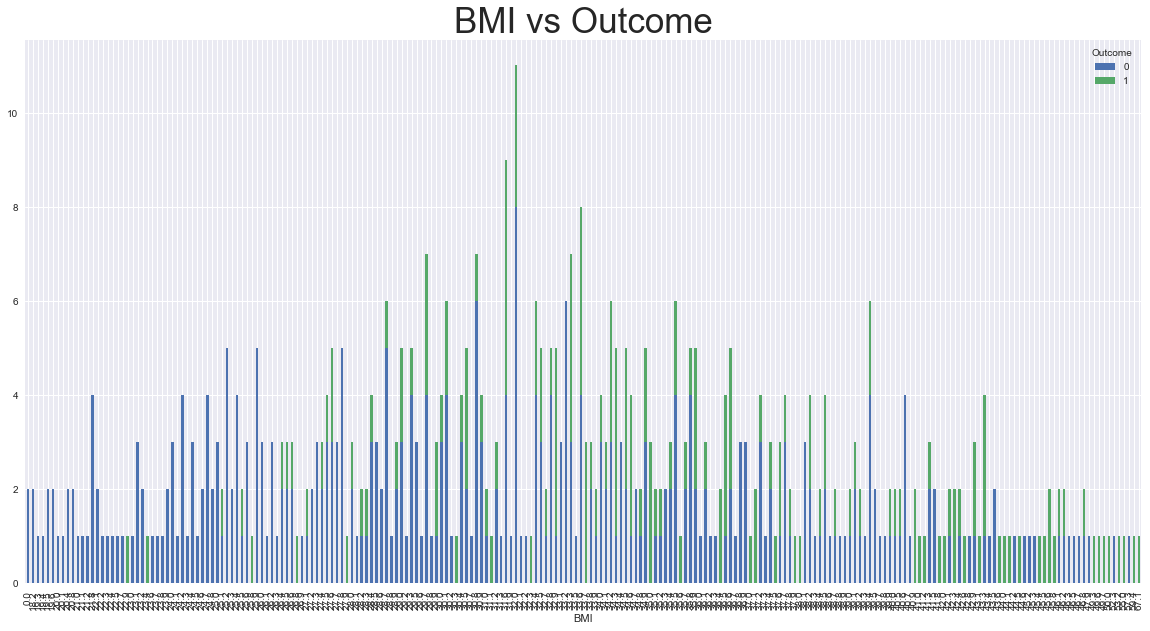

In [14]:
df2.groupby(['BMI', 'Outcome']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('BMI vs Outcome', fontsize=35)

plt.show()

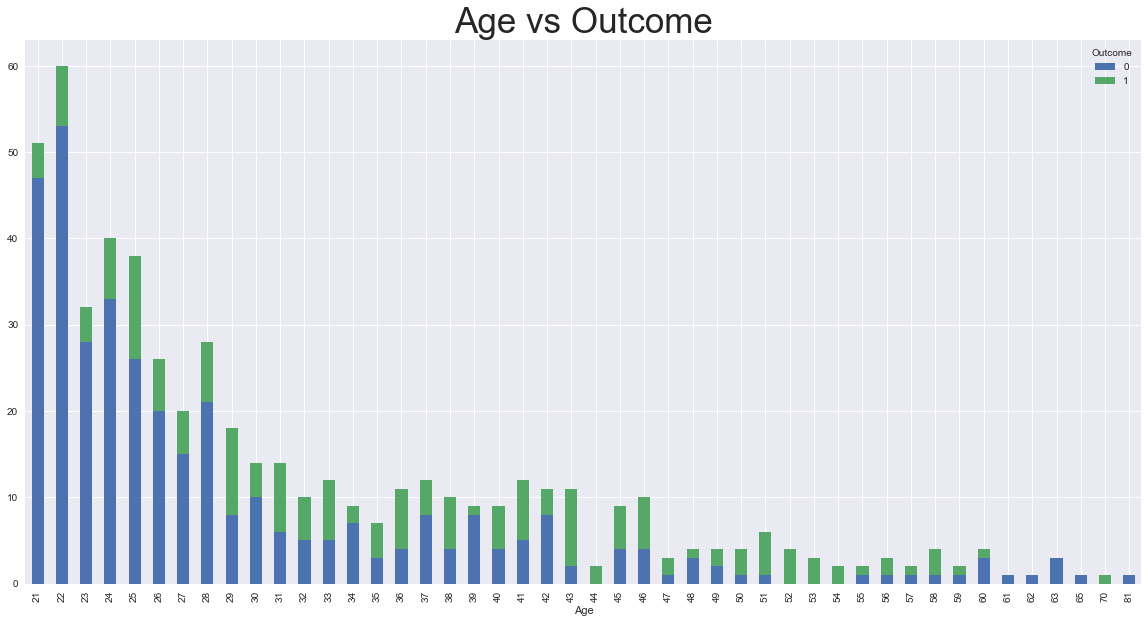

In [15]:
df2.groupby(['Age', 'Outcome']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Age vs Outcome', fontsize=35)

plt.show()

In [16]:
# we will analysise Glucose with other attributes
#make a copy from cols
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
num=cols.copy()
num.remove('Glucose')

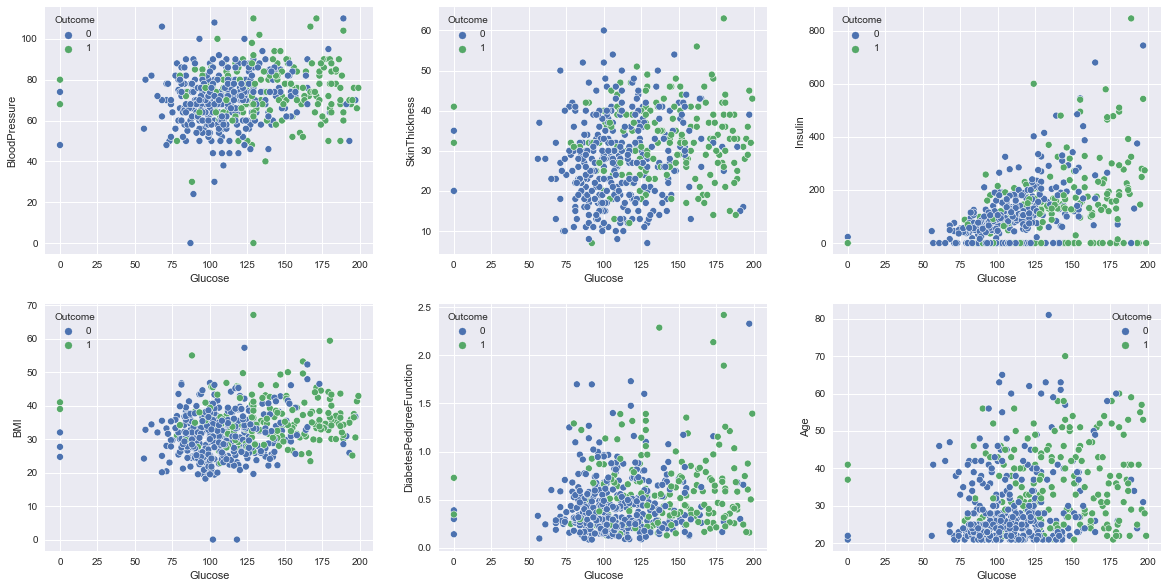

In [17]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(num):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(x='Glucose',y=col,hue='Outcome',data=df2)

In [18]:
# we will analysise BMI with other attributes
#make a copy from cols
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
num=cols.copy()
num.remove('BMI')

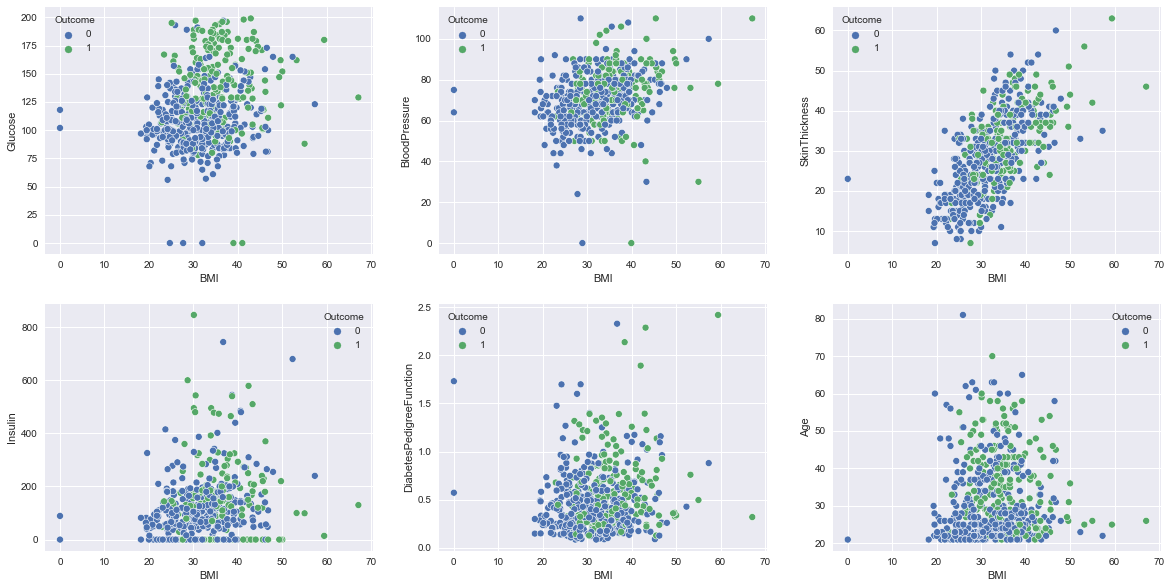

In [19]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(num):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(x='BMI',y=col,hue='Outcome',data=df2)

<AxesSubplot:>

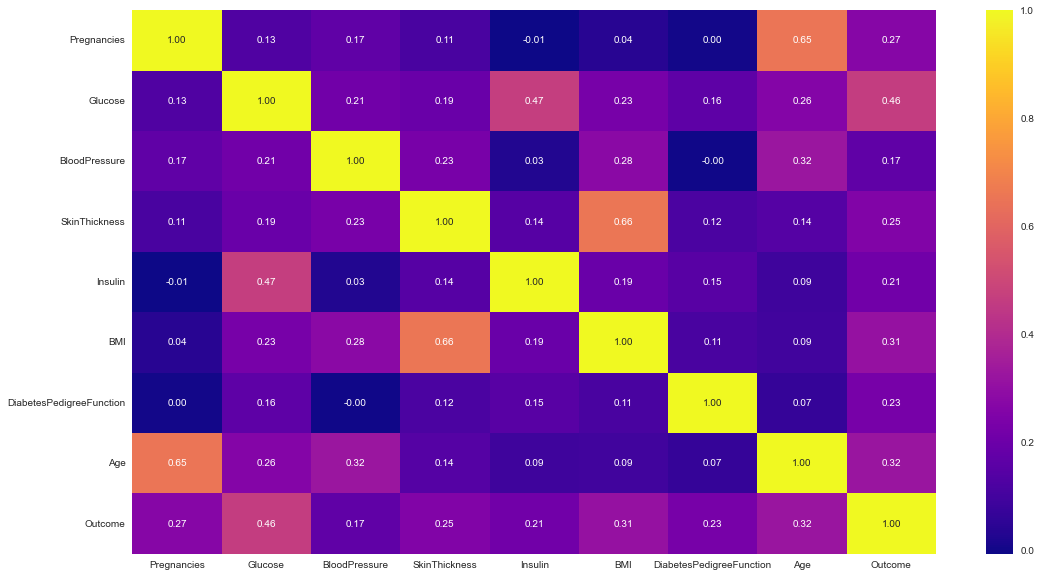

In [20]:
plt.figure(figsize = (18,10))
sns.heatmap(df2.corr(), cmap= 'plasma',annot = True , fmt='.2f' )

In [21]:
x=pd.DataFrame(data,columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

y=data.Outcome.values.reshape(-1,1)# Target variable

In [22]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size= 0.20, random_state=1)

In [23]:
clf= DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train.ravel())
y_pred=clf.predict (x_test)

In [24]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7857142857142857


In [25]:
from sklearn import tree

In [26]:
text_representation=tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 127.50
|   |--- feature_6 <= 28.50
|   |   |--- feature_4 <= 45.40
|   |   |   |--- class: 0
|   |   |--- feature_4 >  45.40
|   |   |   |--- class: 1
|   |--- feature_6 >  28.50
|   |   |--- feature_0 <= 99.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  99.50
|   |   |   |--- class: 0
|--- feature_0 >  127.50
|   |--- feature_4 <= 29.95
|   |   |--- feature_0 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  145.50
|   |   |   |--- class: 1
|   |--- feature_4 >  29.95
|   |   |--- feature_0 <= 154.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  154.50
|   |   |   |--- class: 1



In [27]:
with open('decision_tree.log' ,'w') as fout:
    fout.write (text_representation)

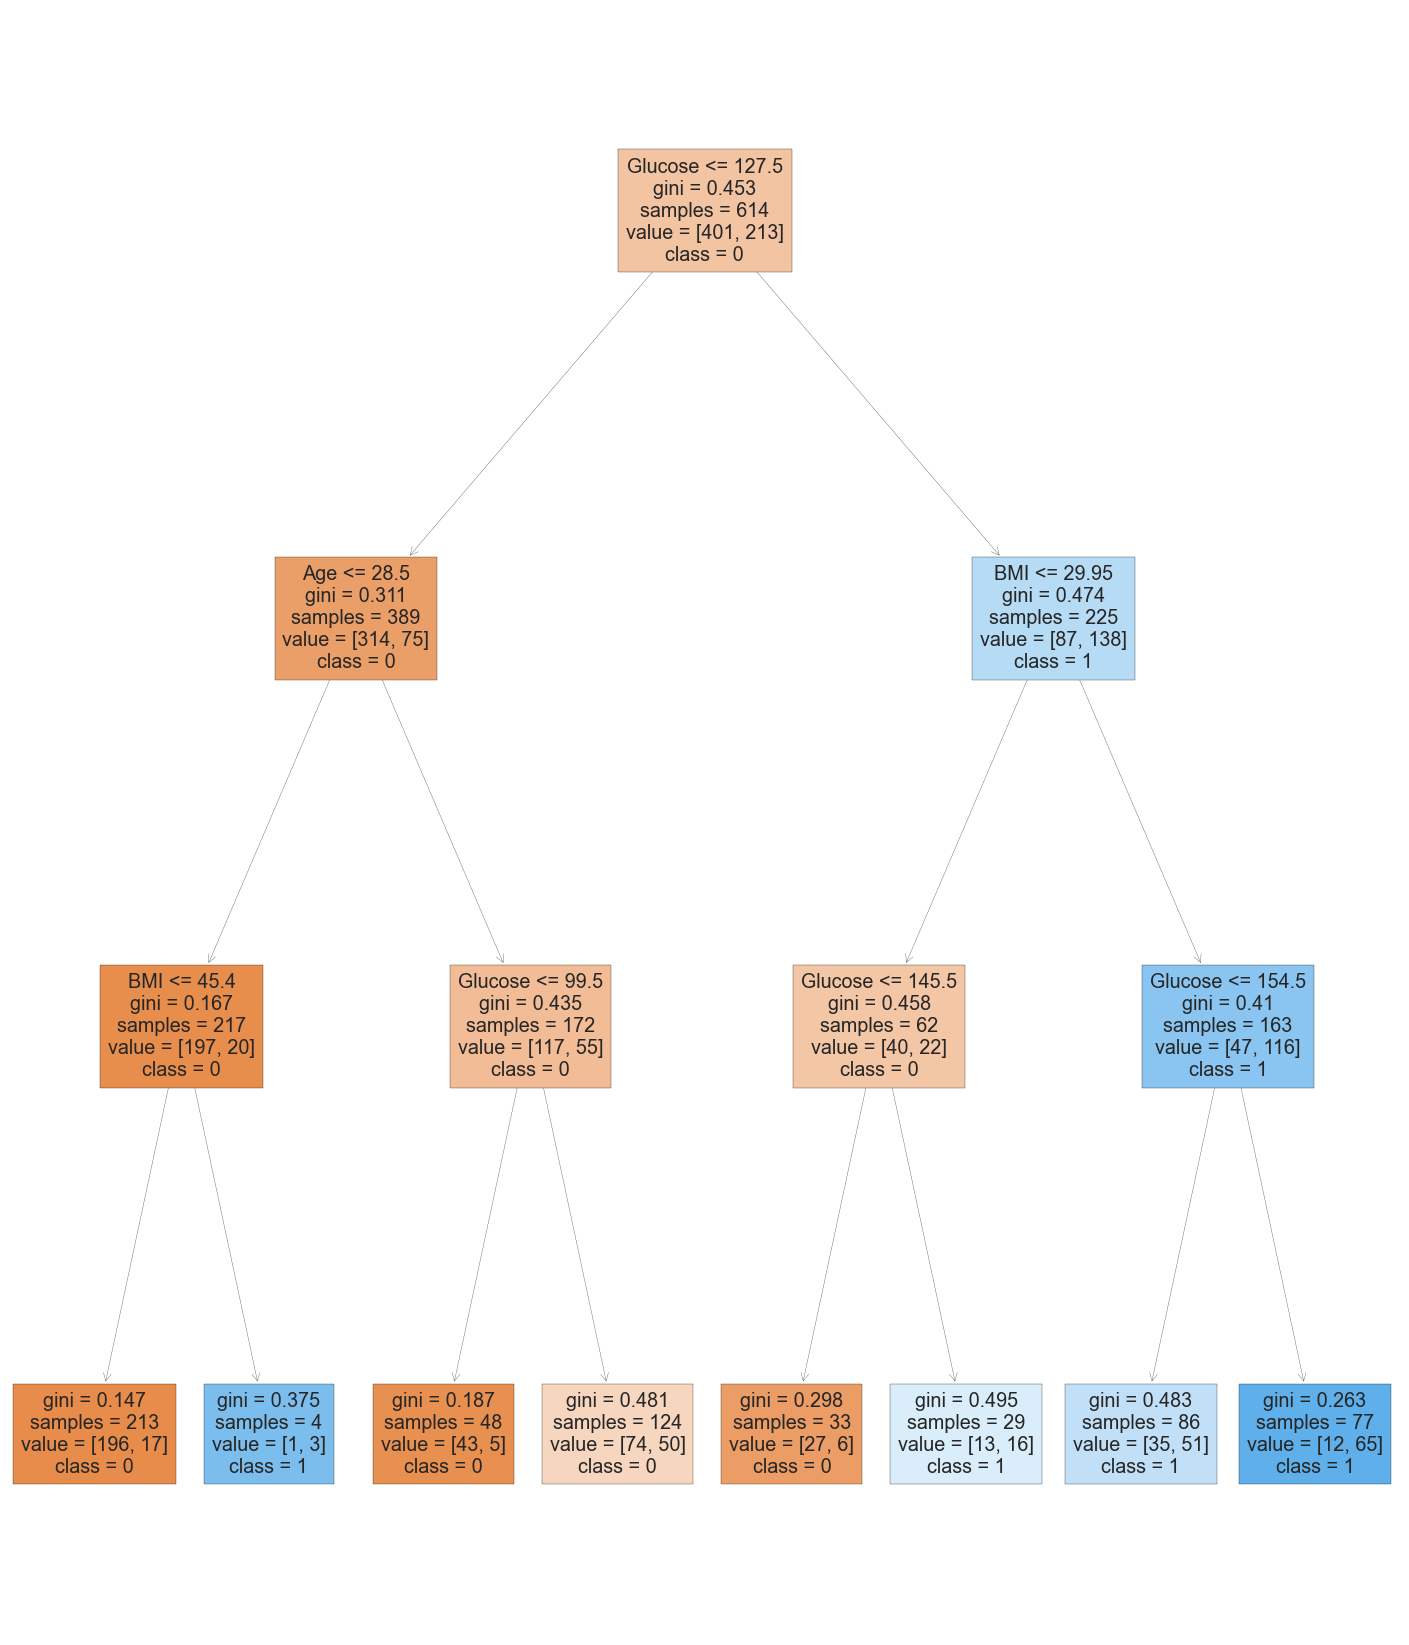

In [28]:
feature_names=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names=['0','1']
fig= plt.figure(figsize=(25,30))
plot= tree.plot_tree (clf,
                     feature_names=feature_names,
                     class_names=target_names,
                     filled=True)
fig.savefig('tree1.png')
                

In [29]:
clf= DecisionTreeClassifier(criterion= 'entropy', max_depth=3)
clf.fit(x_train,y_train.ravel())
y_pred=clf.predict (x_test)

In [30]:
print("Accuracy: " ,metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7987012987012987


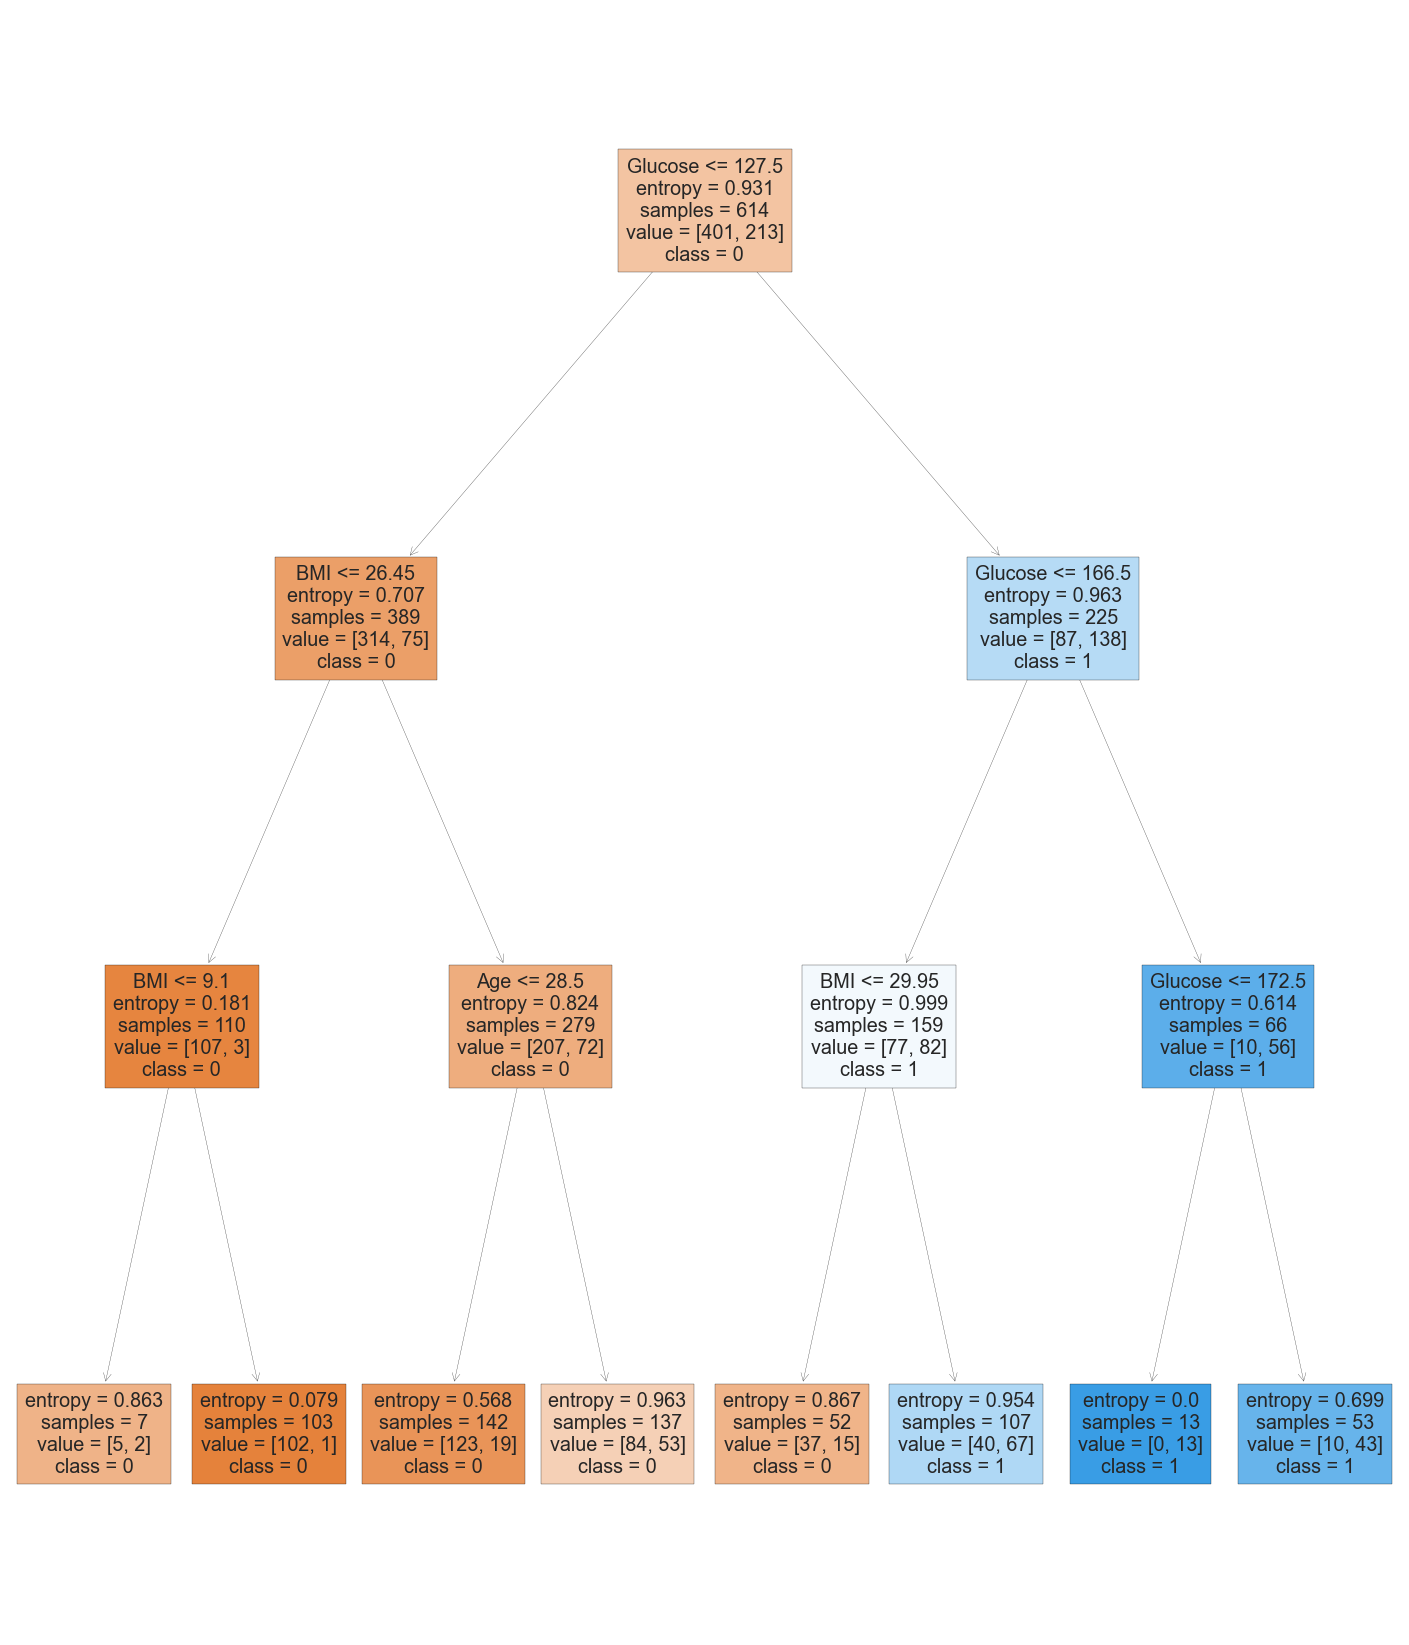

In [31]:
feature_names=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names=['0','1']
fig= plt.figure(figsize=(25,30))
plot= tree.plot_tree (clf,
                     feature_names=feature_names,
                     class_names=target_names,
                     filled=True)
fig.savefig('tree2.png')